In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data file
filename = "stdout-benchmark1.114530.log"
data =  {125: [], 250: [], 1000: [], 2000: []}
with open (filename, "r") as file:
    lines = file.readlines()[40:]
    lines = [l.replace("\n", "") for l in lines]
    lines = [l for l in lines if l != ""]
    i = 0
    while i < len(lines):
        num_procs = int(lines[i].split()[1])
        N = int(lines[i+1].split()[1])
        duration = float(lines[i+3].split()[2])
        data[N].append(duration)
        i += 4

In [3]:
num_procs = np.arange(1, 41)
duration_125 = data[125][:40]
duration_250 = data[250][:40]
duration_1000 = data[1000][:40]
duration_2000 = data[2000][:40]

In [4]:
# Calculate the speed up for each N
speed_up_125 = [duration_125[0] / duration_125[i] for i in range(len(duration_125))]
speed_up_250 = [duration_250[0] / duration_250[i] for i in range(len(duration_250))]
speed_up_1000 = [duration_1000[0] / duration_1000[i] for i in range(len(duration_1000))]
speed_up_2000 = [duration_2000[0] / duration_2000[i] for i in range(len(duration_2000))]

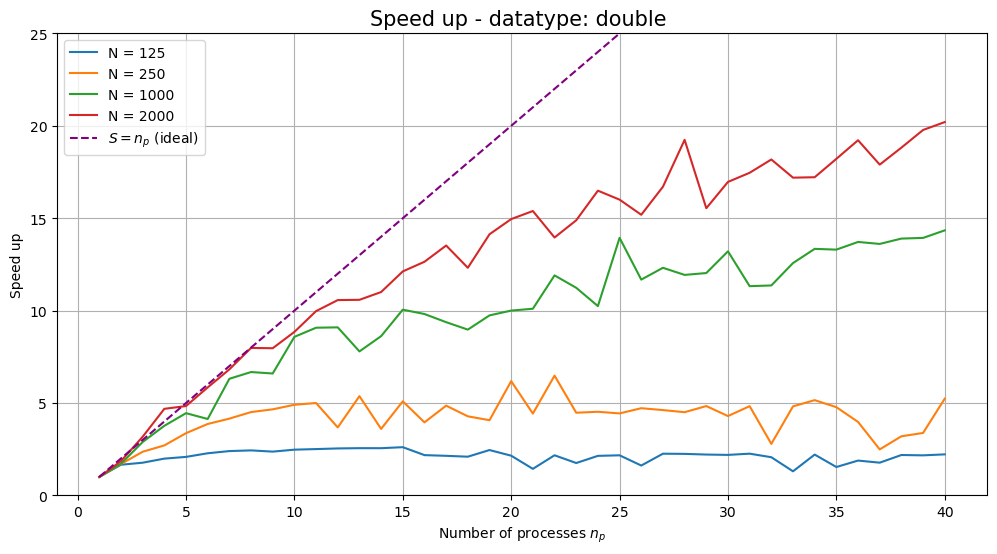

In [17]:
# Plot speed up
plt.figure(figsize=(12,6))
plt.plot(num_procs, speed_up_125, label="N = 125")
plt.plot(num_procs, speed_up_250, label="N = 250")
plt.plot(num_procs, speed_up_1000, label="N = 1000")
plt.plot(num_procs, speed_up_2000, label="N = 2000")
plt.plot(num_procs, num_procs, linestyle="--" , label="$S = n_p$ (ideal)", color="purple")
plt.ylim(0, 25)
plt.legend()
plt.xlabel("Number of processes $n_p$")
plt.ylabel("Speed up")
plt.title("Speed up - datatype: double ", fontsize = 15)
plt.grid('both')
plt.savefig("speedup.png")

In [6]:
# Calculate the efficiency
efficiency_125 = [speed_up_125[i]/num_procs[i] for i in range(len(duration_125))]
efficiency_250 = [speed_up_250[i]/num_procs[i] for i in range(len(duration_250))]
efficiency_1000 = [speed_up_1000[i]/num_procs[i] for i in range(len(duration_1000))]
efficiency_2000 = [speed_up_2000[i]/num_procs[i] for i in range(len(duration_2000))]

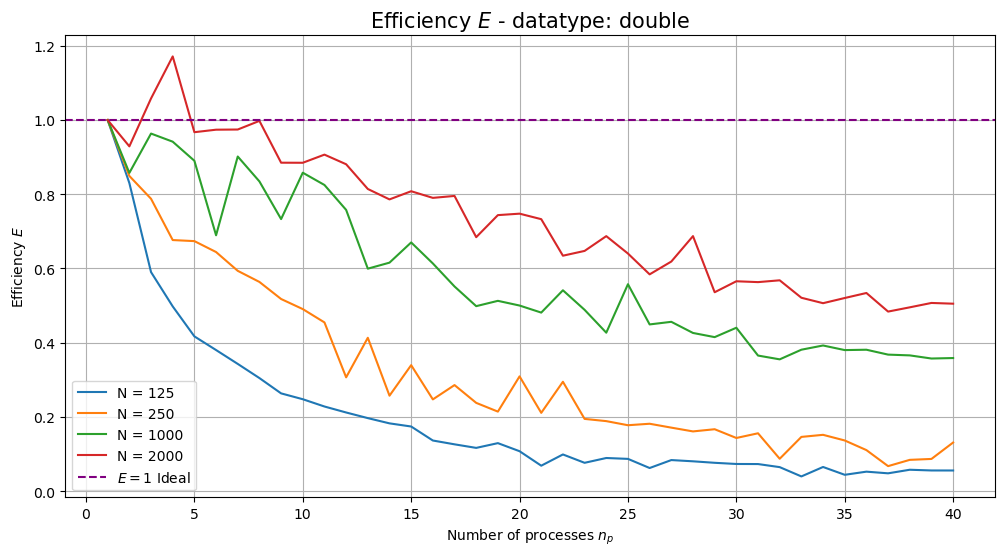

In [18]:
# Plot efficiency
plt.figure(figsize=(12,6))
plt.plot(num_procs, efficiency_125, label="N = 125")
plt.plot(num_procs, efficiency_250, label="N = 250")
plt.plot(num_procs, efficiency_1000, label="N = 1000")
plt.plot(num_procs, efficiency_2000, label="N = 2000")
plt.axhline(y=1, color='purple', linestyle='--', label="$E = 1$ Ideal")
plt.legend()
plt.xlabel("Number of processes $n_p$")
plt.ylabel("Efficiency $E$")
plt.title("Efficiency $E$ - datatype: double", fontsize = 15)
plt.grid('both')
plt.savefig("efficiency.png")